# Home assignment 3

You should work on the assignement in groups/teams of 3 participants. Submissions of single students will not be accepted! Please use the Forum in case of doubt in order to find team mates!

Upload your solution as a jupyter notebook to moodle by Tuesday, 21st of January 23:55h. (The deadline is strict)
It is sufficient if one student of each team submits the solution.


You should add comments to your code where necessary and print the relevant results. You should also always test your code on self-chosen examples.

Do not forget to specify the (First_name, Last_name, student_id (matrikelnummer)) of all contributing students in the jupyter notebook here:

Student 1: `First_name, Last_name, student_id`

Student 2: `First_name, Last_name, student_id`

Student 3: `First_name, Last_name, student_id`

We will have a "kaggle"-like competition within the class. You will be given a task and you will have to find a solution that maximizes the accuracy of some unknown test set.

# Task
You are provided with a set of reviews written on the Yelp platform. Your task is to predict the ratings (between 1 and 5) from the review text. 
We will evaluate your solution with respect to accuracy, i.e., for how many reviews in the hold out set did your solution predicted the correct rating.

You have to come up with a classification model, which gives the best result. 

You can download the dataset here - https://drive.google.com/file/d/1Wm2nkOzwj7PSRY9q_FY2TgjqEuKhykmv/view?usp=sharing

Note that we have only provided a the training set and we will evaluate your model on a held out test set. Of course you can sample a small validation dataset from the given training set. You can start from a base architecture and then add modifications to it. Apart from the notebook, you will have to submit a 1-page report describing how you ended up with your final network design (what did you try, what were the results, why did you do which modifications, etc...). At the minimum, you should try at least one CNN and one RNN-based architecture and test some modifications for potential improvement.

You can reuse the codes from exercises and previous home assignments. Please indicate on your submission also if you are fine with us sharing your solutions with your fellow students of this course if you make it to one of the top solutions.

In [4]:
import pandas as pd
import nltk
import string
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer, PorterStemmer
from nltk.corpus import stopwords
import gensim
import csv
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
# sentences = sent_tokenize (text)
# sentences
import pandas as pd
# import for separation train and test (k-fold cross validation)
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

In [266]:
# Here we first import all the data by using pandas, and seperate them into test set and train set for later use. 
df = pd.read_csv("train.csv",header= None, index_col = False, names = ['star','review'])

In [604]:
df_file = df.sample(frac=0.5, replace=True)
# df_file = df[0:3000].copy()
df_file.head()

,star,review
32151,1,This place is slow and the pizza sucks.\nI thi...
268998,1,I've lived near this store for about a year no...
646788,1,0-3 stars for food\n0-2 stars for service\n\nF...
365427,4,Since Tryst used to be one of my fav Vegas clu...
133176,2,"Dark, dingy, and smoke filled, this little cas..."


## CNN 
### 1. preprocessing and clean the data,  split data into test and train datasets
### 2. Extracting features from cleaned data
### 3. Modeling from data

### 1. preprocessing and clean the data
 Since it is a review from yelp, identities of people are not important. Punctuation, numbers and special characters are not as important as regular text so we may ignore them (maybe? if text have numbers maybe indicate the score)
1. remove punctuation,numbers and special characters
2. remove general word, such as stopword, or "he,she,her"
3. we split each text into individual tokens and stemming the word

In [605]:


def lowercase(corpus):
    w = corpus.lower()
    return w

def tokenization(text):
    tokens = word_tokenize (text)
    return tokens

def removePunctuation(corpus):
    #puncts = string.punctuation
    #text_wo_puncts = [x for x in emma_text if x not in puncts]
    #print(string.punctuation)
    #tokens = list(filter(lambda token: token not in string.punctuation, corpus))
    #tokens = list(filter(lambda token: token.isalpha(), tokens))
    
    translator = str.maketrans(dict.fromkeys(string.punctuation))
    text = corpus.translate(translator)
    return text

def stemming(tokens):
    snowball_stemmer = SnowballStemmer('english', ignore_stopwords=True)
    ps = PorterStemmer() 
    p_lst = []
    s_lst = []
    for w in tokens: 
        p_lst.append(ps.stem(w))
        s_lst.append(snowball_stemmer.stem(w))
    return p_lst

def stopWordRemoval(tokens):
    #stop_words = set(stopwords.words('english'))
    stop_words = {'place','o', 'ours', 'my', 'this', 'having', 'myself', 'what', 'of', 'these', 'had', 'just', "it's", 'each', 'y', 'whom', 'being', 'then', "you'll",  'while', 'it', 'themselves', 'once', 'isn', 'its', 'are', "isn't", 'yours', 'i', 'where', 'ourselves',  'that', 'be', 'own', 'than', 'his', 'yourself', 'is', 'as', 'we',  'll', 'before', 'were', 'by', 'from', 'doing', 'if', "that'll", 'all', "she's",  'off',  'her', 'herself', 'a', 'about', 'between', 'm', "you've", 'himself', 'd', 'their', 'during', 've', 'so', 'an','theirs', 'any', 'over', 'they', 'he', 'more', 'further', 'other', "you'd",  'can', 'against', 'and', 't', 'itself', 'on', 'does', 'him', 'because', 'your', 'until', 'she', 'did', 'with', 'them', 'up', 'how', 'yourselves', 'or', 'too', 'at', 'but', 'some', 'me', 's', 'been', 'you',  'under', 'down', 'should', 'will',  'now', 'why', 'there', 'those', 'am', "should've", 'both', 'has', 'which', 'again', 'do', 'through',  'above', 'the', 'for', 'who', 'in', 'when', 'ma', 'our', 'have', "you're", 'here', 'to', 'into', 'hers', 'was', 'same', 'such', 'after', 're', 'out', 'below'}
    filtered_sentence = [w for w in tokens if not w in stop_words] 
    return filtered_sentence

def combine(text):
    combi = ' '.join(text)
    return combi

def preprocessedData(sentence):
    #data = combine(stopWordRemoval(stemming(removePunctuation(lowercase(sentence)))))
    data = combine(stemming(stopWordRemoval(tokenization(removePunctuation(lowercase(sentence))))))
    
    return data

df_file["cleaned_review"] = df_file.apply(lambda row: preprocessedData(row.review),axis = 1)
df_file.head()


,star,review,cleaned_review
32151,1,This place is slow and the pizza sucks.\nI thi...,slow pizza sucksni think might particular loca...
268998,1,I've lived near this store for about a year no...,ive live near store year ive use mostli conniv...
646788,1,0-3 stars for food\n0-2 stars for service\n\nF...,03 star foodn02 star servicennfirst impress gr...
365427,4,Since Tryst used to be one of my fav Vegas clu...,sinc tryst use one fav vega club check xs got ...
133176,2,"Dark, dingy, and smoke filled, this little cas...",dark dingi smoke fill littl casino san hotel e...


In [606]:
len(df_file)

325000

### By performing wordcloud we can see that what kind word appears the most and least

In [613]:
all_words = ' '.join([text for text in df_file['cleaned_review']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

KeyboardInterrupt: 

### We can also see that if limit the star to 1 or 5, the words appears different, for example , good just appear a bit often in star 5 review than in star 1 review, it is more like a middle word.

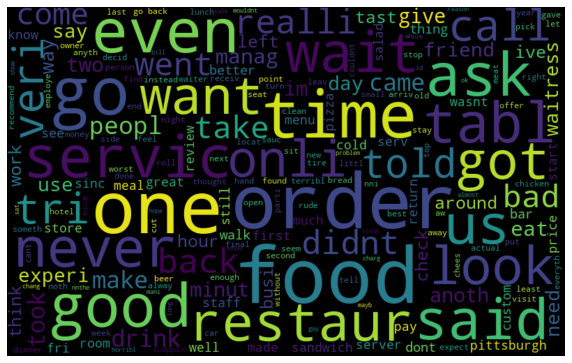

In [325]:
#star == 1
all_words = ' '.join([text for text in df_file['cleaned_review'][df_file["star"]==1]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

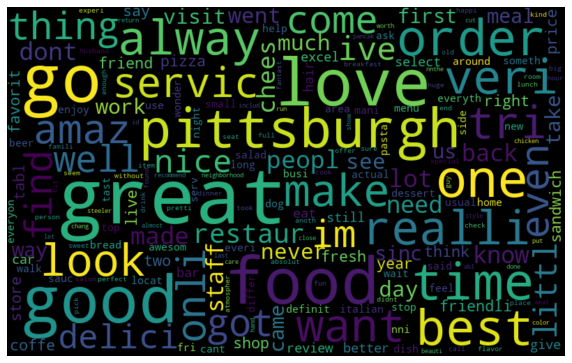

In [326]:
#star ==5
all_words = ' '.join([text for text in df_file['cleaned_review'][df_file["star"]==5]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## 2. Extracting features from data, we build a vocabulary from all words (bag of words/TF-IDF/word embeddings)

### Bag of words

In [327]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(df_file['cleaned_review'])
bow

<3000x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 108186 stored elements in Compressed Sparse Row format>

In [328]:
length = bow.shape[0]
train_bow = bow[:int(length*0.9),:]
test_bow = bow[int(length*0.9):,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, df_file['star'][:int(length*0.9)],test_size=0.3)


### TF-IDF 
#TF = (Number of times term t appears in a document)/(Number of terms in the document) 
#IDF = log(N/n), where, N is the number of documents and n is the number of documents a term t has appeared in.
#TF-IDF = TF*IDF

In [329]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(df_file['cleaned_review'])
tfidf

<3000x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 108186 stored elements in Compressed Sparse Row format>

In [330]:
length_tf = tfidf.shape[0]
train_tf = tfidf[:int(length_tf*0.9),:]
test_tf = tfidf[int(length_tf*0.9):,:]

# splitting data into training and validation set
xtrain_tf, xvalid_tf, ytrain_tf, yvalid_tf = train_test_split(train_tf, df_file['star'][:int(length_tf*0.9)],test_size=0.3)
xtrain_tf

<1890x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 67226 stored elements in Compressed Sparse Row format>

### Word2Vec

In [314]:
# token = df_file['trimmed_review'].apply(lambda x: x.split()) # tokenizing

# model_w2v = gensim.models.Word2Vec(
#             token,
#             size=200, # desired no. of features/independent variables 
#             window=5, # context window size
#             min_count=2,
#             sg = 1, # 1 for skip-gram model
#             hs = 0,
#             negative = 10, # for negative sampling
#             workers= 2, # no.of cores
#             seed = 34)

# model_w2v.train(token, total_examples= len(df_file['cleaned_review']), epochs=20)

(29787330, 34193460)

### Word Embedding

In [614]:
import torch
import sentencepiece as spm
from torchtext import data
from torchtext import datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import random
import numpy as np
import spacy
import time
import matplotlib.pyplot as plt

In [615]:
# change toe tensor data df is a dataframe
from collections import Counter
from statistics import mean 

# listSIZE find the 75% to choose for the how many word we choose to keep
def listSIZE(df):
    length = []
    for w in df:
        n = w.split(" ")
        length.append(len(n))
    q75, q25 = np.percentile(length, [75 ,25])
    return int(q75)

# find the most common word and save in list 
def mostCommon(review, SIZE):
    lst = review.split(' ')    
    # if total length is smaller than SIZE, then we don't need to 
    
    if (len(review)<= SIZE):
        return review
    newlist = sorted(lst, key=lambda k: frequency_Vocab[k],reverse =True)
    # list( dict.fromkeys(mylist) )
    newlist = newlist[:SIZE] 
    return newlist

# return trimmed Data with fixed size length 
def trimData(df, BATCH_SIZE):
    dat = df["cleaned_review"]
    file =[]
    for w in dat:
        file += (w.split(' '))

    frequency_Vocab = Counter(file)
    s = listSIZE(dat)
    print("cut length",s)
    df['trimmed_review'] = df.apply(lambda row: combine(mostCommon(row.cleaned_review,s)),axis = 1)
    return df

df_file = trimData(df_file,100) #BATCH_SIZE
df_file.head()


cut length 92


,star,review,cleaned_review,trimmed_review
32151,1,This place is slow and the pizza sucks.\nI thi...,slow pizza sucksni think might particular loca...,like go one one one back look food order order...
268998,1,I've lived near this store for about a year no...,ive live near store year ive use mostli conniv...,no go price ive year ive ill store seem store ...
646788,1,0-3 stars for food\n0-2 stars for service\n\nF...,03 star foodn02 star servicennfirst impress gr...,not not not get look food food order order gre...
365427,4,Since Tryst used to be one of my fav Vegas clu...,sinc tryst use one fav vega club check xs got ...,get one one one look us wait got see hour didn...
133176,2,"Dark, dingy, and smoke filled, this little cas...",dark dingi smoke fill littl casino san hotel e...,not veri veri look look great want come would ...


In [616]:
len(df_file)

325000

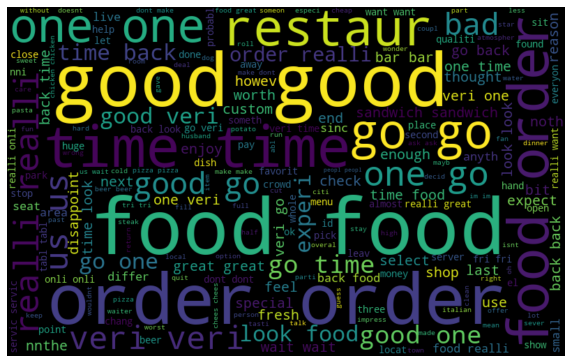

In [333]:

all_words = ' '.join([text for text in df_file['trimmed_review']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

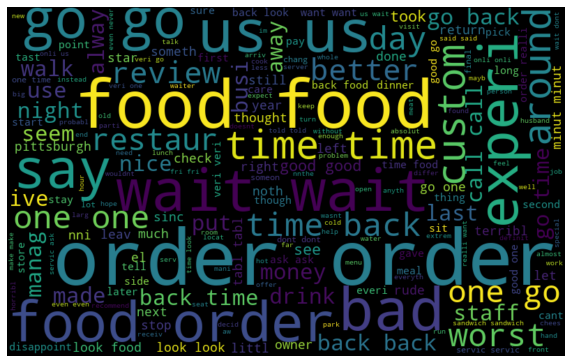

In [334]:
#star == 1
all_words = ' '.join([text for text in df_file['trimmed_review'][df_file["star"]==1]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

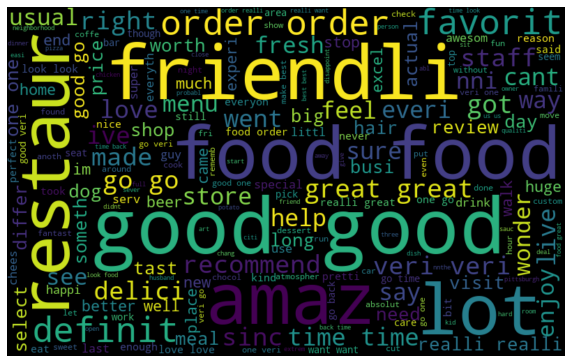

In [335]:
#star == 5
all_words = ' '.join([text for text in df_file['trimmed_review'][df_file["star"]==5]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [726]:
df_file[['star','trimmed_review']].head()
train_, valid_ = train_test_split(df_file, test_size=0.2)
train_[['star','trimmed_review']].to_csv("data_file.csv",index= False)
valid_[['star','trimmed_review']].to_csv("valid.csv",index= False)


In [744]:
from torchtext import data


#postprocess_pipeline = data.Pipeline(lambda x: word2tensor(x,2401))
#TEXT.postprocessing(postprocessing=postprocess_pipeline)
TEXT = data.Field( batch_first = True)#, postprocessing=postprocess_pipeline)
LABEL = data.Field(dtype = torch.int,sequential=False, use_vocab = True)

data_field = [('star', LABEL),('trimmed_review', TEXT)]

train_data,valid_data = data.TabularDataset.splits(
                # the root directory where the data lies
               path = "./",
               train='data_file.csv',validation="valid.csv",
               format='csv',
               skip_header=True, # if your csv header has a header, make sure to pass this to ensure it doesn't get proceesed as data!
               fields=data_field)
print(len(train_data))


260000


In [745]:

# Select only the most important 30000 words
MAX_VOCAB_SIZE = 300000
# Build vocabulary
TEXT.build_vocab(train_data, 
                 max_size = MAX_VOCAB_SIZE, 
                 # Load pretrained embeddings
                 vectors = "glove.6B.100d", 
                 unk_init = torch.Tensor.normal_)
LABEL.build_vocab(train_data)

#TEXT.process

In [746]:
from torchtext.data import Iterator, BucketIterator
BATCH_SIZE = 100
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# from torch.utils.data import Dataset, DataLoader
# train_dataloader = DataLoader(train_data,10)
# print(len(train_dataloader))

train_iterator,valid_iterator = BucketIterator.splits(
 (train_data,valid_data), # we pass in the datasets we want the iterator to draw data from
 batch_size=BATCH_SIZE,
 device=device, 
 sort_key=lambda x: len(x.trimmed_review), # the BucketIterator needs to be told what function it should use to group the data.
 sort_within_batch=False # we pass repeat=False because we want to wrap this Iterator layer.
)
# print((train_iterator))
# for i in train_iterator:
#     print(i) 
#     #print(a,b)
# #print(next(train_iterator))

In [747]:
def toTensor(itera):
    for i in itera:
        print(len(i))

        print(i.trimmed_review)
        print((i.trimmed_review).shape)
        break
toTensor(train_iterator)

100
tensor([[    7,     7,     6,  ...,   625,   963, 26582],
        [   13,    10,     4,  ...,     1,     1,     1],
        [    2,     6,    24,  ...,     1,     1,     1],
        ...,
        [    2,     2,     2,  ...,   570,   385, 47356],
        [    2,     5,     7,  ...,  1438,   626,   780],
        [    2,     2,    11,  ...,     1,     1,     1]])
torch.Size([100, 92])


In [756]:
import torch.nn as nn
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
import torch.nn.functional as F

    
class CNN_Text(nn.Module):
    ''' Define network architecture and forward path. '''
    def __init__(self, vocab_size, 
                 vector_size, n_filters, 
                 filter_sizes, output_dim, 
                 dropout, pad_idx):
        print("CNNTEXT", vocab_size, 
                 vector_size, n_filters, 
                 filter_sizes, output_dim, 
                 dropout, pad_idx )
        super().__init__()
        # Create word embeddings from the input words     
        self.embedding = nn.Embedding(vocab_size, vector_size, 
                                      padding_idx = pad_idx)
        
        # Specify convolutions with filters of different sizes (fs)
        self.convs = nn.ModuleList([nn.Conv2d(in_channels = 1, 
                                              out_channels = n_filters, 
                                              kernel_size = (fs,vector_size)) 
                                    for fs in filter_sizes])
        
        
        # Drop some of the nodes to increase robustness in training
        self.dropout = nn.Dropout(dropout)
        # Add a fully connected layer for final predicitons
        self.linear = nn.Linear(len(filter_sizes) * n_filters, output_dim)
        
        
        
    def forward(self, text):
        '''Forward path of the network.'''       
        # Get word embeddings and formt them for convolutions
        embedded = self.embedding(text).unsqueeze(1)
        
        # Perform convolutions and apply activation functions
        conved = [F.relu(conv(embedded)).squeeze(3) for conv in self.convs]
            
        # Pooling layer to reduce dimensionality    
        pooled = [F.max_pool1d(conv, conv.shape[2]).squeeze(2) for conv in conved]
        
        # Dropout layer
        cat = self.dropout(torch.cat(pooled, dim = 4))
        return self.linear(cat)

In [757]:
# Vocabulary size
INPUT_DIM = len(TEXT.vocab)
print(len(TEXT.vocab))

# Vector size (lower-dimensional repr. of each word)
EMBEDDING_DIM = 100

# Number of filters
N_FILTERS = 100

# N-grams that we want to analuze using filters
FILTER_SIZES = [1, 2, 3, 4, 5]

# Output of the linear layer (prob of a negative review)
OUTPUT_DIM = 5

# Proportion of units to drop

DROPOUT = 0.5

204668


In [758]:
# Zero the initial weights of the UNKnown and padding tokens.
UNK_IDX = TEXT.vocab.stoi[TEXT.unk_token]

# The string token used as padding. Default: “<pad>”.
PAD_IDX = TEXT.vocab.stoi[TEXT.pad_token]

# Initialize model and load pre-trained embeddings
model = CNN_Text(INPUT_DIM, EMBEDDING_DIM, 
            N_FILTERS, FILTER_SIZES, 
            OUTPUT_DIM, DROPOUT, PAD_IDX)

model.embedding.weight.data.copy_(TEXT.vocab.vectors)

model.embedding.weight.data[UNK_IDX] = torch.zeros(EMBEDDING_DIM)
model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)
model = model.to(device)

CNNTEXT 204668 100 100 [1, 2, 3, 4, 5] 5 0.5 1


In [759]:
# Helper functions
def accuracy(preds, y):
    """ Return accuracy per batch. """
    correct = (torch.round(torch.sigmoid(preds)) == y).float() 
    return correct.sum() / len(correct)

def epoch_time(start_time, end_time):
    '''Track training time. '''
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [760]:
def train(model, iterator, optimizer, criterion,learning_rate=0.01):
    '''Train the model with specified data, optimizer, and loss function. '''
    epoch_loss = 0
    epoch_acc = 0
    print("epoch_loss",epoch_loss)
    model.train()
    optimizer = optim.Adam(model.parameters(),lr = learning_rate)

    criterion = nn.CrossEntropyLoss()
    
    for batch in iterator:
        #add to 4 dimension
        #print(batch.trimmed_review.shape)
        #batch.trimmed_review =(batch.trimmed_review).unsqueeze(1)  
        # Reset the gradient to not use them in multiple passes 
        
        optimizer.zero_grad()
        
        tri_review = (batch.trimmed_review).to(torch.float32)
        print((batch.star).shape)
        #labe = (batch.star).unsqueeze(1)
        
        predictions = model(batch.trimmed_review)#.squeeze(1)
        #predictions = predictions.unsqueeze(0)
        print("prediction",predictions)
        print("batch.star", batch.star)
        print("prediction.shape",predictions.shape)
        
        labe = (batch.star).to(device=device, dtype=torch.int64)
        # prediction (N,C), C number of class target (N)
        
        loss = criterion(predictions,labe)    
        acc = accuracy(predictions, labe)
        
        # Backprop
        loss.backward()
        
        # Optimize the weights
        optimizer.step()
        
        # Record accuracy and loss
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        print(epoch_loss)
        

    return epoch_loss / len(iterator), epoch_acc / len(iterator)


def evaluate(model, iterator, criterion):
    '''Evaluate model performance. '''
    epoch_loss = 0
    epoch_acc = 0
    
    # Turm off dropout while evaluating
    model.eval()
    
    # No need to backprop in eval
    with torch.no_grad():
    
        for batch in iterator:
            #batch.trimmed_review =(batch.trimmed_review).unsqueeze(1)
       
            predictions = model(batch.trimmed_review)#.squeeze(1)           
            labe = (batch.star).to(device=device, dtype=torch.int64)
        
            loss = criterion(predictions, labe)          
            acc = accuracy(predictions, labe)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [761]:
# Network optimizer
optimizer = optim.Adam(model.parameters())

# Loss function
#criterion = nn.BCEWithLogitsLoss()
criterion = nn.CrossEntropyLoss()
model = model.to(device)
criterion = criterion.to(device)

In [762]:
# Training loop
N_EPOCHS = 100

best_valid_loss = float('inf')
val_loss = []
val_acc = []
tr_loss = []
tr_acc = []

for epoch in range(N_EPOCHS):
    
    # Calculate training time
    start_time = time.time()
    
    # Get epoch losses and accuracies 
    #train_iterator = addOneDim(train_iterator)
    #valid_iterator = addOneDim(valid_iterator)   
    
    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
    
    end_time = time.time()
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    # Save training metrics
    val_loss.append(valid_loss)
    val_acc.append(valid_acc)
    tr_loss.append(train_loss)
    tr_acc.append(train_acc)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'CNN-model.pt')
    
    print(f'Epoch: {epoch+1:2} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

epoch_loss 0
torch.Size([100])


IndexError: Dimension out of range (expected to be in range of [-2, 1], but got 5)

In [ ]:

# Plot accuracy and loss
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].plot(val_loss, label='Validation loss')
ax[0].plot(tr_loss, label='Training loss')
ax[0].set_title('Losses')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[1].plot(val_acc, label='Validation accuracy')
ax[1].plot(tr_acc, label='Training accuracy')
ax[1].set_title('Accuracies')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
plt.legend()
plt.show()